In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=np.array([1,2,3])
y=np.sqrt(x.T.dot(x))
print(y)

3.7416573867739413


### Problem 1. Gradient Descent Algorithm to Compute $A^{-1}$.

In [3]:
# Initialization

# Set random seed so that experiments are repeatable

np.random.seed(1)

# Initialize the Matrix and Vectors

n = 3                   # Dimension of space

A = np.random.rand(n,n) # Random matrix in R^{nXn}

x = np.eye(n)           # Input data are the standard basis vectors in R^n
y = A.dot(x)            # Compute y = Ax

# Initialize Weights, Learning Rate, and Epochs

W = np.random.rand(n,n)*.01
step_size = 1.5

eta, epochs = 2*step_size/3, 501

error = []

# Run Gradient Descent and Display the MSE
for s in range(epochs):
    etemp = []
    for k in range(n):
        W0=W[k].copy()
        #print(W0)
        pred = W0.dot(y)
        #print(x[k])
        #print(pred)
        err = pred - x[k]
        grad = W0*err
        #print(grad)
        W0-= eta * grad
        W[k]=W0
print('A={}'.format(A))
print('W={}'.format(W))
print('W*A={}'.format(W*A))

A=[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]]
W=[[ 2.39678127e+000  6.06407709e-073  2.62441412e-003]
 [-1.67668679e-001  6.06390797e+000  2.50820111e-216]
 [ 2.08003035e-138  0.00000000e+000  2.52036789e+000]]
W*A=[[ 9.99510531e-001  4.36810326e-073  3.00166886e-007]
 [-5.06917030e-002  8.89914216e-001  2.31603765e-217]
 [ 3.87426892e-139  0.00000000e+000  1.00000000e+000]]


### Problem 2. Direct Method for Fitting a Trigonometric Polynomial

[[ 1.  1.  0.  1.]
 [ 1.  0.  1. -1.]
 [ 1. -1.  0.  1.]
 [ 1.  0. -1. -1.]]
[[2]
 [1]
 [3]
 [2]]
[ 2.  -0.5 -0.5  0.5]


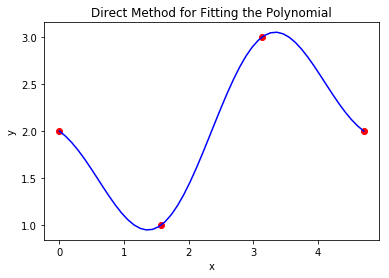

In [4]:
x = np.array([0, np.pi/2, np.pi, 3*np.pi/2])
y = np.array([2,1,3,2])
A = np.zeros((4,4))
#Make the coefficient matrix
for i in range(0,4):
    for j in range(0,4):
        if(j==0):
            A[i][j] = 1
        elif(j==1):
            A[i][j] = int(np.cos(x[i]))
        elif(j==2):
            A[i][j] = int(np.sin(x[i]))
        else:
            A[i][j] = int(np.cos(2*x[i]))
print(A)
print(np.c_[y])
#Solve for the coefficients
C=np.linalg.solve(A,y)
print(C)
#Compute the function over the interval
f = lambda x: C[0]+C[1]*np.cos(x)+C[2]*np.sin(x)+C[3]*np.cos(2*x)
r=np.linspace(0,3*np.pi/2)
plt.plot(x,y,'ro',r,f(r),'b')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Direct Method for Fitting the Polynomial")
plt.savefig('2.png')

### Problem 3. Solve the collocation problem for this signal using orthogonality (trapezoidal rule).

[ 9.05756648e-07 -9.24750764e-07  9.57359987e-07 -1.00503418e-06
  1.06951352e-06 -1.15367824e-06  1.26099500e-06 -1.36168531e-06
  2.90523832e-06  3.30658897e-05  5.46537569e-04  5.16454372e-03
  2.97350088e-02  1.03774235e-01  2.19698424e-01  2.82091962e-01
  2.19698424e-01  1.03774235e-01  2.97350088e-02  5.16454372e-03
  5.46537569e-04  3.30658897e-05  2.90523832e-06 -1.36168531e-06
  1.26099500e-06 -1.15367824e-06  1.06951352e-06 -1.00503418e-06
  9.57359987e-07 -9.24750764e-07  9.05756648e-07 -8.99439494e-07]


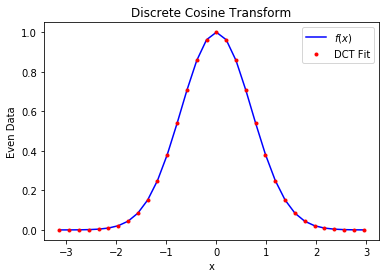

In [5]:
even_data = np.array([  5.17231862e-05,   1.70895723e-04,   5.22745478e-04,
         1.48034364e-03,   3.88103862e-03,   9.41990566e-03,
         2.11669512e-02,   4.40335024e-02,   8.48049725e-02,
         1.51207235e-01,   2.49595638e-01,   3.81429762e-01,
         5.39641486e-01,   7.06820680e-01,   8.57089811e-01,
         9.62180571e-01,   1.00000000e+00,   9.62180571e-01,
         8.57089811e-01,   7.06820680e-01,   5.39641486e-01,
         3.81429762e-01,   2.49595638e-01,   1.51207235e-01,
         8.48049725e-02,   4.40335024e-02,   2.11669512e-02,
         9.41990566e-03,   3.88103862e-03,   1.48034364e-03,
         5.22745478e-04,   1.70895723e-04])
Nk=32
npts=np.shape(even_data)[0]+1
x=np.linspace(-np.pi,np.pi,npts)
x=x[:-1]

k=np.arange(-Nk/2+1,Nk/2+1)
k=np.c_[k]

C=np.cos(k*x)
a=C.dot(even_data)/(npts-1)
print(a)
plt.plot(x,even_data,'b',x,a.dot(C),'r.')
plt.legend(['$f(x)$','DCT Fit']);
plt.xlabel('x');
plt.ylabel('Even Data');
plt.title('Discrete Cosine Transform');
plt.savefig('3.png')

### Problem 4. Reconstruct the signal from problem 3 using fewer than 32 frequencies. Use the smallest number of frequencies possible to ensure a "good" fit.

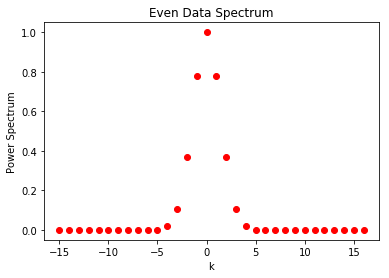

In [6]:
pwr_spectrum = np.fabs(a)
pwr_spectrum = pwr_spectrum/pwr_spectrum.max()
plt.plot(k,pwr_spectrum,'ro')
plt.xlabel('k')
plt.ylabel('Power Spectrum');
plt.title('Even Data Spectrum');
plt.savefig('EvenPower.png')

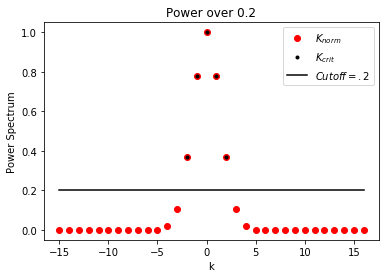

In [7]:
crit1=.2
kr = np.c_[k[pwr_spectrum>crit1]]
ar = a[pwr_spectrum>crit1]
plt.plot(k,pwr_spectrum,'ro',kr,pwr_spectrum[pwr_spectrum>crit1],'k.', k , 0*k+.2, 'k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.legend(['$K_{norm}$','$K_{crit}$', '$Cutoff=.2$']);
plt.title('Power over 0.2');
plt.savefig('32.png')

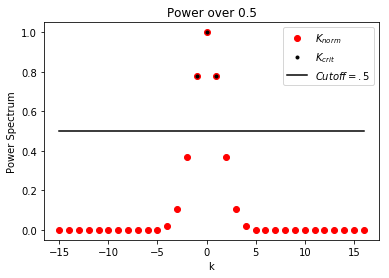

In [8]:
crit2=.5
kr2 = np.c_[k[pwr_spectrum>crit2]]
ar2 = a[pwr_spectrum>crit2]
plt.plot(k,pwr_spectrum,'ro',kr2,pwr_spectrum[pwr_spectrum>crit2],'k.', k , 0*k+.5, 'k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.legend(['$K_{norm}$','$K_{crit}$', '$Cutoff=.5$']);
plt.title('Power over 0.5');
plt.savefig('35.png')

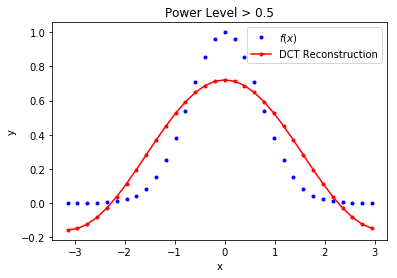

In [9]:
Cr2 = np.cos(kr2*x)
plt.plot(x,even_data,'b.',x,ar2.dot(Cr2),'r.-')
plt.title('Power Level > 0.5')
plt.legend(['$f(x)$','DCT Reconstruction']);
plt.xlabel('x');
plt.ylabel('y');
plt.savefig('35reconstruct.png')

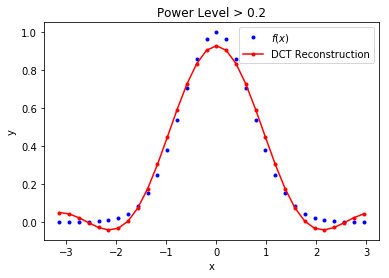

In [10]:
Cr1 = np.cos(kr*x)
plt.plot(x,even_data,'b.',x,ar.dot(Cr1),'r.-')
plt.title('Power Level > 0.2')
plt.legend(['$f(x)$','DCT Reconstruction']);
plt.xlabel('x');
plt.ylabel('y');
plt.savefig('32reconstruct.png')

### Problem 5. Solve the collocation problem for this signal using orthogonality (trapezoidal rule). We will not reconstruct this signal.

[-9.48682607e-02  1.91561376e-01 -2.92045894e-01  3.98595491e-01
 -5.14010861e-01  6.41941919e-01 -7.87396087e-01  9.57591306e-01
 -1.16347490e+00  1.42260202e+00 -1.76497149e+00  2.24564908e+00
 -2.97207975e+00  4.12129646e+00 -3.83791259e+00  0.00000000e+00
  3.83791259e+00 -4.12129646e+00  2.97207975e+00 -2.24564908e+00
  1.76497149e+00 -1.42260202e+00  1.16347490e+00 -9.57591306e-01
  7.87396087e-01 -6.41941919e-01  5.14010861e-01 -3.98595491e-01
  2.92045894e-01 -1.91561376e-01  9.48682607e-02  1.95119529e-16]


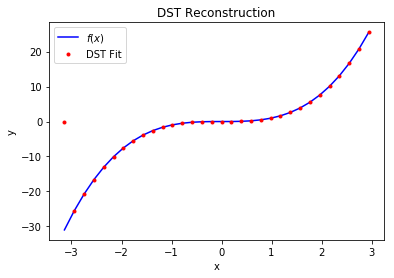

In [11]:
odd_data = np.array([ -3.10062767e+01,  -2.55483847e+01,  -2.07717830e+01,
        -1.66310522e+01,  -1.30807730e+01,  -1.00755259e+01,
        -7.56989177e+00,  -5.51845110e+00,  -3.87578459e+00,
        -2.59647288e+00,  -1.63509662e+00,  -9.46236471e-01,
        -4.84473073e-01,  -2.04387078e-01,  -6.05591341e-02,
        -7.56989177e-03,   0.00000000e+00,   7.56989177e-03,
         6.05591341e-02,   2.04387078e-01,   4.84473073e-01,
         9.46236471e-01,   1.63509662e+00,   2.59647288e+00,
         3.87578459e+00,   5.51845110e+00,   7.56989177e+00,
         1.00755259e+01,   1.30807730e+01,   1.66310522e+01,
         2.07717830e+01,   2.55483847e+01])

Nk=32
npts=np.shape(even_data)[0]+1
x=np.linspace(-np.pi,np.pi,npts)
x=x[:-1]
k=np.arange(-Nk/2+1,Nk/2+1)
k=np.c_[k]

S=np.sin(k*x)
b=S.dot(odd_data)/(npts-1)
print(b)
plt.plot(x,odd_data,'b',x,b.dot(S),'r.')
plt.legend(['$f(x)$','DST Fit']);
plt.xlabel('x');
plt.ylabel('y');
plt.title('DST Reconstruction');
plt.savefig('5.png')

### Problem 6. Solve Gauss' collocation problem for Pallas' trajectory using orthogonality (trapezoidal rule). Note that this signal will require both the cosine and sine functions!

###### $$\sum_{k=-{\frac{N}2}+1}^{\frac{N}2} a_k\cos(kx_j) + b_k\sin(kx_j) = f_j$$ $N$ is the number of grid-spacings.

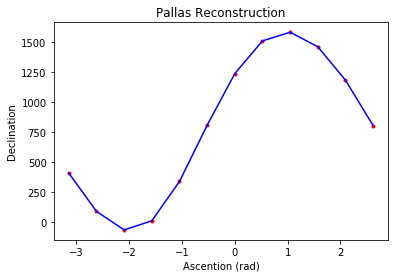

In [12]:
# Declination of Pallas
f = np.array([408,89,-66,10,338,807,1238,1511,1583,1462,1183,804])
N = len(f)
# The imposed grid [-pi, pi]
L = np.pi
theta = np.linspace(-L,L,N+1)
theta = theta[:-1] # Construct the theta grid (be sure to assume periodicty and match lengths)
k = np.arange(-N/2+1,N/2+1) # Construct the frequency grid
k = np.c_[k]
C=np.cos(k*theta)
S=np.sin(k*theta)
a=C.dot(f)/(N) # Compute the cosine coefficients (DCT)
b=S.dot(f)/(N) # Compute the sine coefficients (DST)
F = a.dot(C)+b.dot(S) # Collocate the ascension and declination of Pallas' position
# HINT: Notice that F is a sum of the dot products a*DCT + b*DST
plt.plot(theta,f,'r.',theta,F,'b');
plt.xlabel('Ascention (rad)');
plt.ylabel('Declination')
plt.title('Pallas Reconstruction')
plt.savefig('6.png')

### Problem 7. Reconstruct the signal (trajectory of Pallas) from problem 6 with fewer than 12 frequencies.

###### Reconstruct (a simpler estimate) of the trajectory with only a few of the coefficients and frequencies.
* Identify the array elements $a_k$ and $b_k$ that have the highest weight (largest coefficients from power spectrum).
* Identify the frequencies that correspond to the these weights (look at corresponding $k$ from the power spectrum).
* Hint: there will be three for $a_k$ and two for $b_k$.

###### Reconstruct the trajectory with only these $a_k\cos(k\theta)$ and $b_k\sin(k\theta)$ that you have dicovered from the power spectrum. It may be easiest to simply hard-code this function rather trying to use the dot-product.
$$r(\theta) = a[m_1]\cos(k[m_1]\theta) + a[m_2]\cos(k[m_2]\theta) + a[m_3]\cos(k[m_3]\theta) + b[m_2]\sin(k[m_2]\theta) + b[m_3]\sin(k[m_3]\theta)$$
* $k[m_1]$, $k[m_2]$, and $k[m_3]$ are the three frequencies from the previous question
* $m_1$, $m_2$, and $m_3$ are the three indices
* $m_2$ is the same for both cosine and sine cases and $m_3$ is the same as well

In [19]:
pwr_spectruma = np.fabs(a)
pwr_spectruma = pwr_spectruma/pwr_spectruma.max()


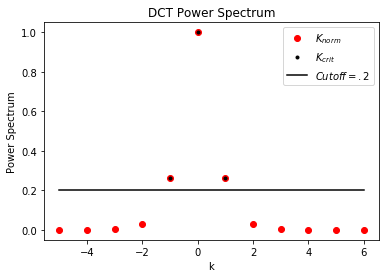

In [20]:
crit=.2
ka = np.c_[k[pwr_spectruma>crit]]
aa = a[pwr_spectruma>crit]
plt.plot(k,pwr_spectruma,'ro',ka,pwr_spectruma[pwr_spectruma>crit],'k.', k , 0*k+.2, 'k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.legend(['$K_{norm}$','$K_{crit}$', '$Cutoff=.2$']);
plt.title('DCT Power Spectrum')
plt.savefig('7a.png')

In [21]:
pwr_spectrumb = np.fabs(b)
pwr_spectrumb = pwr_spectrumb/pwr_spectrumb.max()


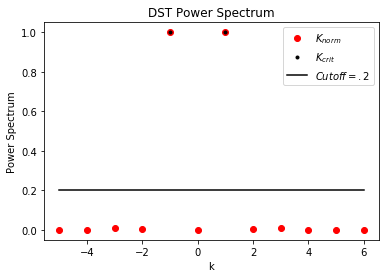

In [22]:
crit=.2
kb = np.c_[k[pwr_spectrumb>crit]]
bb = b[pwr_spectrumb>crit]
plt.plot(k,pwr_spectrumb,'ro',kb,pwr_spectrumb[pwr_spectrumb>crit],'k.', k , 0*k+.2, 'k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.legend(['$K_{norm}$','$K_{crit}$', '$Cutoff=.2$']);
plt.title('DST Power Spectrum')
plt.savefig('7b.png')

In [23]:
r = lambda x: aa[0]*np.cos(ka[0]*x)+aa[1]*np.cos(ka[1]*x)+aa[2]*np.cos(ka[2]*x)+bb[0]*np.sin(kb[0]*x)+bb[1]*np.sin(kb[1]*x)

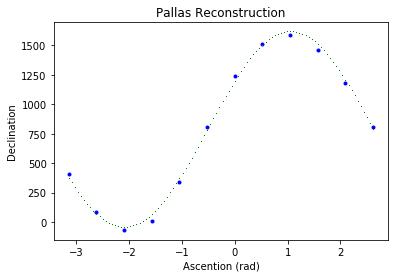

In [25]:
x=np.linspace(-L,5*L/6,100)

plt.plot(theta,f,'b.',x,r(x),'g,');
plt.xlabel('Ascention (rad)');
plt.ylabel('Declination');
plt.title('Pallas Reconstruction');
plt.savefig('7.png');